# EDA

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv


import model.train as train
import model.config as config
import utils as utils
import model.dataset.game_matchup as ds_games_matchup
from pandas_profiling import ProfileReport
from yellowbrick.target import FeatureCorrelation

%matplotlib inline

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Setup

In [2]:
sns.set(style='whitegrid'
        #, palette=sns.color_palette("Paired_r")
        , font_scale=1.5, color_codes=True)

#pd.options.display.max_columns = None
#pd.set_option("display.max_colwidth", None)
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_columns", 100)

### Load Dataset

In [3]:
df = pd.read_csv("data/cris_data.csv")

### Visualize data

In [102]:
def plot_heatmap(data, title, size=(30, 24)):
    plt.figure(figsize = size)
    #plt.figure(figsize = (50, 44))
    heatmap = sns.heatmap(data,
            linewidth=1,
            annot=True
            ,annot_kws={'size' : 10} 
                         )
    plt.title(title, fontsize=25)
    plt.show()
    return heatmap

def plot_half_heatmap(data, title, size=(30, 24)):
    plt.figure(figsize = size)
    mask = np.zeros_like(data)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        heatmap = sns.heatmap(data, mask=mask, annot_kws={'size' : 12}, linewidths=1, annot=True)

    plt.title(title, fontsize=25)
    plt.show()
    return heatmap

def save_heatmap(heatmap, name):
    figure = heatmap.get_figure()    
    figure.savefig(f'plots/{name}.png')

In [6]:
columns = list(df.columns)
columns

['G',
 'E',
 'A1_A1',
 'A1_IST',
 'A2_A2',
 'A2_IST',
 'A3_A3',
 'A3_IST',
 'A4_A4',
 'A4_IST',
 'A5_A5',
 'A5_IST',
 'A6_A6',
 'A6_IST',
 'A7_A7',
 'A7_IST',
 'B1_B1',
 'B1_IST',
 'B2_B2',
 'B2_IST',
 'B3_B3',
 'B3_IST',
 'B4_B4',
 'B4_IST',
 'B5_B5',
 'B5_IST',
 'B6_B6',
 'B6_IST',
 'B7_B7',
 'B7_IST',
 'B8_B8',
 'B8_IST',
 'C1_C1',
 'C1_IST',
 'C2_C2',
 'C2_IST',
 'C3_C3',
 'C3_IST',
 'C4_C4',
 'C4_IST',
 'C5_C5',
 'C5_IST',
 'C6_C6',
 'C6_IST',
 'C7_C7',
 'C7_IST',
 'C8_C8',
 'C8_IST',
 'C9_C9',
 'C9_IST',
 'C10_C10',
 'C10_IST',
 'C11_C11',
 'C11_IST',
 'C12_C12',
 'C12_IST',
 'C13_C13',
 'C13_IST',
 'C14_C14',
 'C14_IST',
 'C15_C15',
 'C15_IST',
 'D1_D1',
 'D1_IST',
 'D2_D2',
 'D2_IST',
 'D3_D3',
 'D3_IST',
 'E1_E1',
 'E1_IST',
 'E2_E2',
 'E2_IST',
 'F1_F1',
 'F1_IST',
 'F2_F2',
 'F2_IST',
 'F3_F3',
 'F3_IST',
 'F4_F4',
 'F4_IST',
 'F5_F5',
 'F5_IST',
 'G1_G1',
 'G1_IST',
 'G2_G2',
 'G2_IST',
 'G3_G3',
 'G3_IST',
 'H1_H1',
 'H1_IST',
 'H2_H2',
 'H2_IST',
 'I1_I1',
 'I1_IST',
 'I2

In [7]:
columns_t = [v for v in columns[2:] if 'T' in v]
columns_c = [v for v in columns[2:] if not v in columns_t] 

### Utils functions

In [41]:
groups = df.G.unique()
groups[:2]

array(['Diseño', 'Supervision'], dtype=object)

### Calculate group correlation

In [57]:
df_grp = df[df.G.isin(groups[:])]
df_g = df[df.G.isin(groups[:2])].groupby("G")[columns_t]

#### Calculate time group correlation

In [ ]:
r = df_grp.melt(id_vars=['G'], value_vars=columns_t)
result = pd.pivot_table(r, values='value', index=['variable'],
                    columns=['G'], aggfunc=np.mean)

g_corr = result.corr()
heatmap = plot_heatmap(g_corr, "Time by Group - Pearson", size=(10,8))
save_heatmap(heatmap, "cris_group_time_pearson")

#### Calculate cost group correlation

In [ ]:
r = df_grp.melt(id_vars=['G'], value_vars=columns_c)
result = pd.pivot_table(r, values='value', index=['variable'],
                    columns=['G'], aggfunc=np.mean)

g_corr = result.corr()
heatmap = plot_heatmap(g_corr, "Cost by Group - Pearson", size=(10,8))
save_heatmap(heatmap, "cris_group_cost_pearson")

In [ ]:
result.to_csv("data/cris_cost_group.csv")

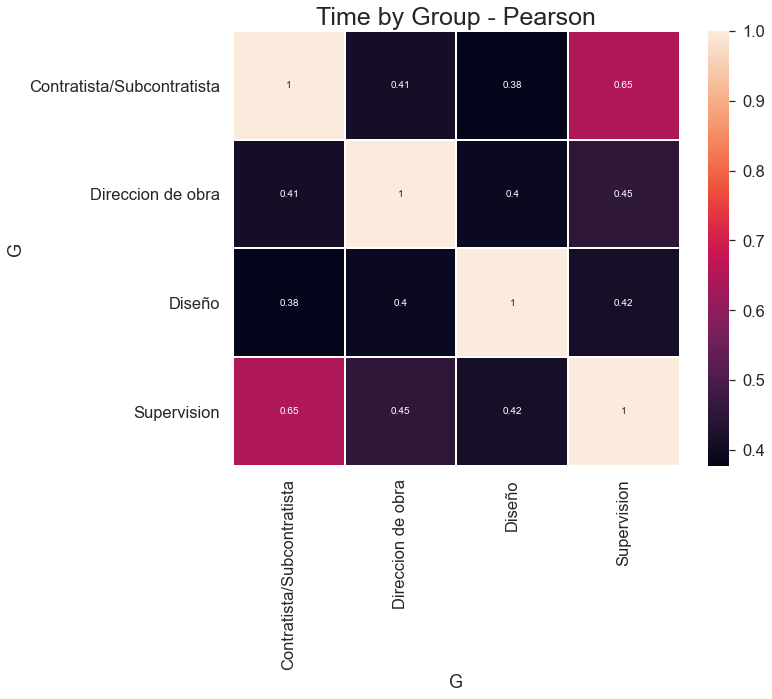

In [110]:
### Calculate factors correlation

#### Calculate cost group correlation

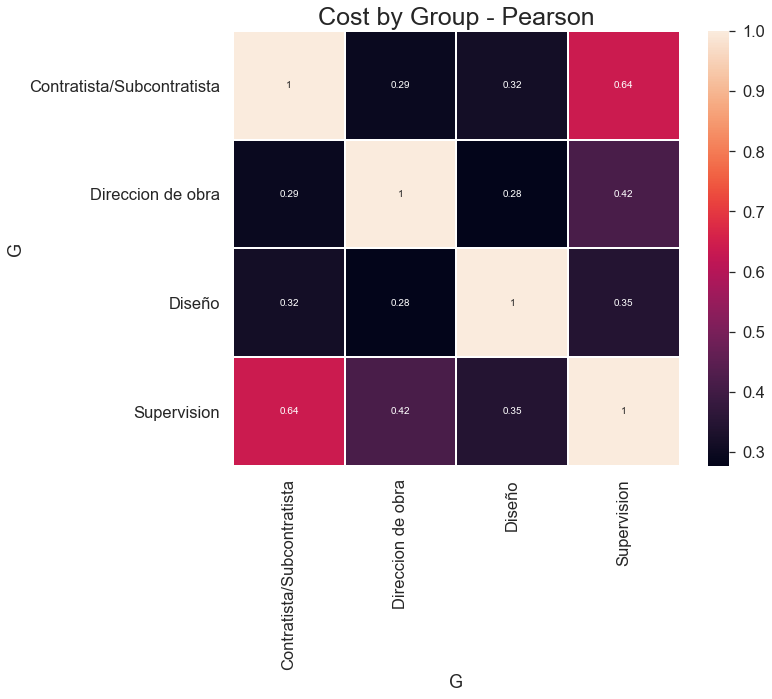

In [113]:
r = df_grp.melt(id_vars=['G'], value_vars=columns_c)
result = pd.pivot_table(r, values='value', index=['variable'],
                    columns=['G'], aggfunc=np.mean)

g_corr = result.corr()
heatmap = plot_heatmap(g_corr, "Cost by Group - Pearson", size=(10,8))
save_heatmap(heatmap, "cris_group_cost_pearson")

In [114]:
result.to_csv("data/cris_cost_group.csv")

### Calculate factors correlation

#### Cost correlation

In [18]:
c_corr = df[columns_c].corr(method='pearson')

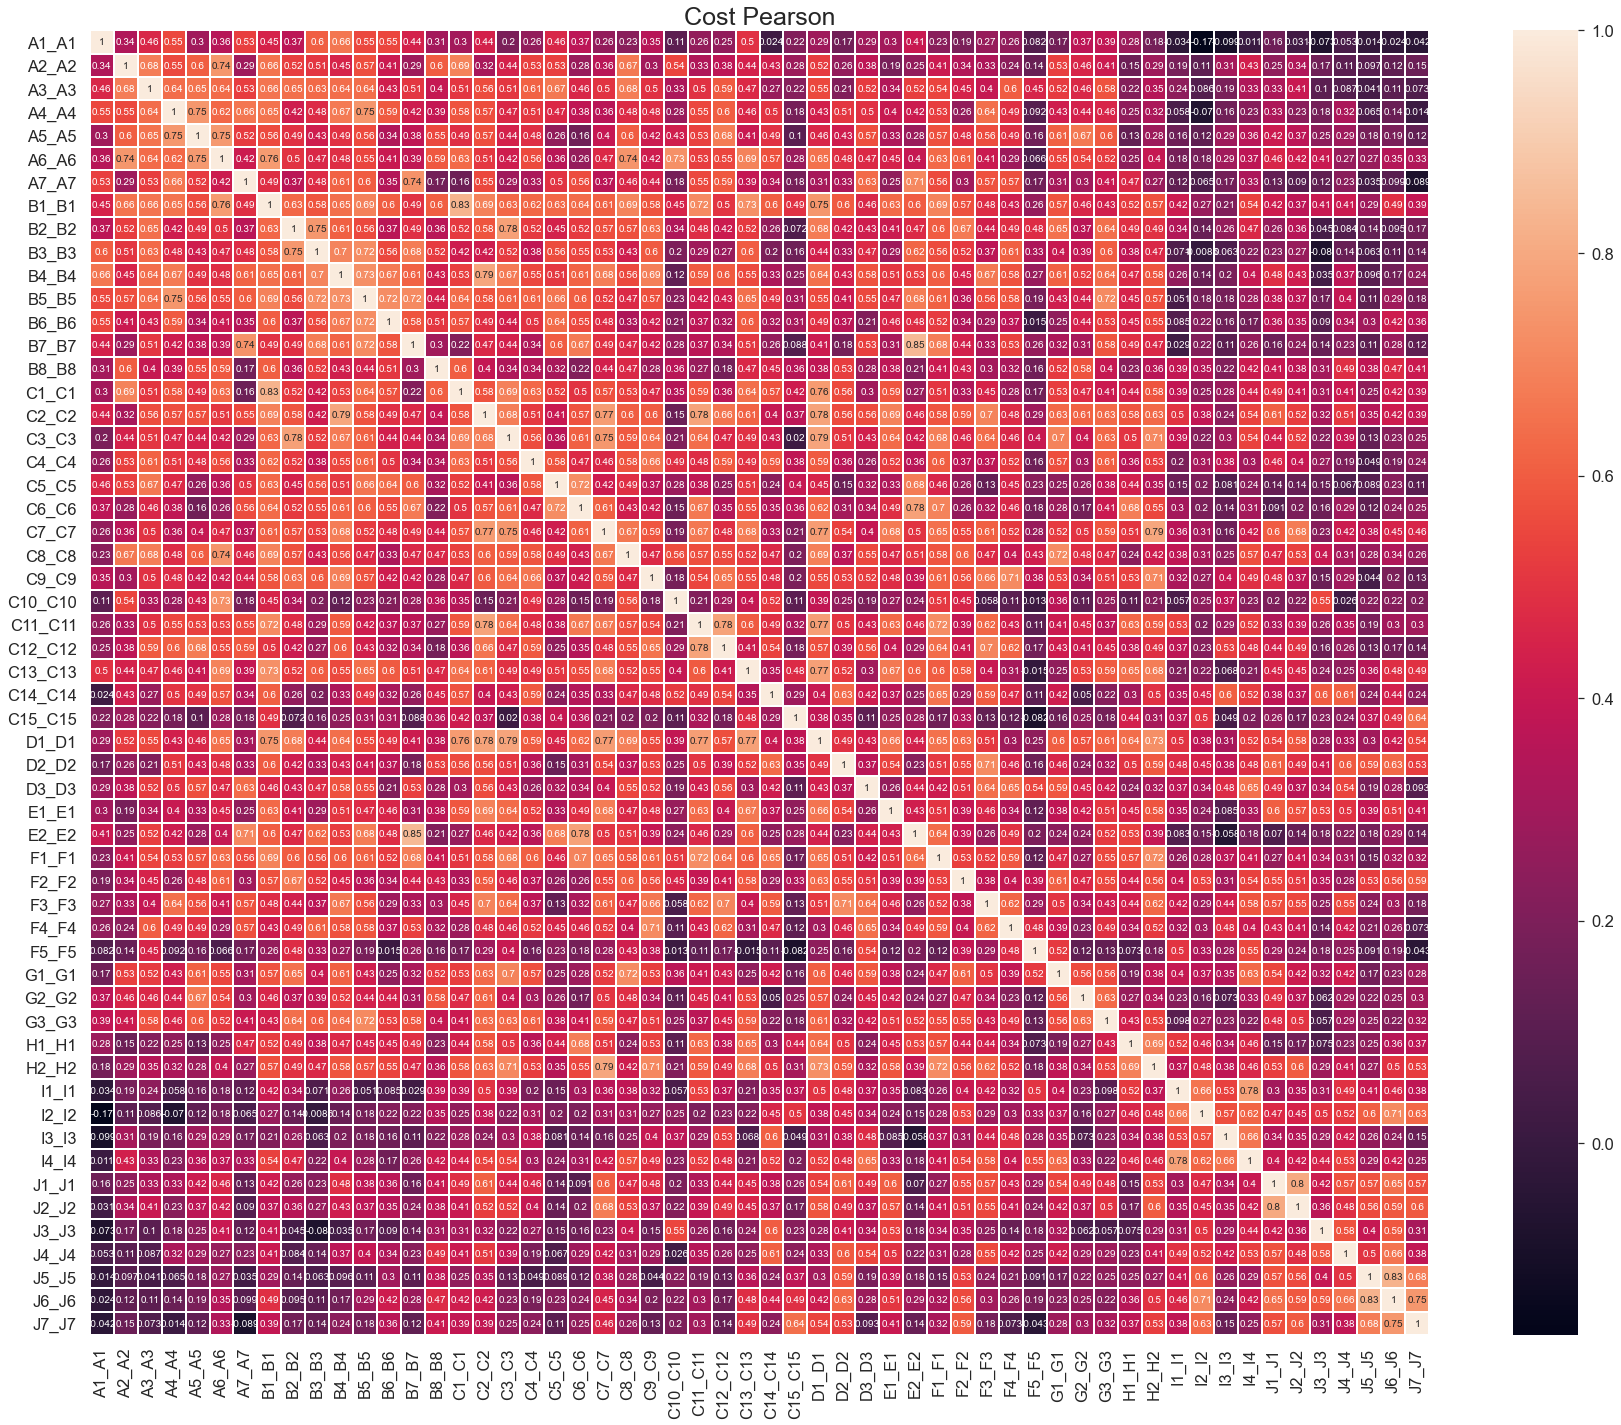

In [19]:
heatmap = plot_heatmap(c_corr, "Cost Pearson")
save_heatmap(heatmap, "cris_cost_pearson")

In [20]:
c_corr

A1_A1     A2_A2     A3_A3     A4_A4     A5_A5     A6_A6     A7_A7  \
A1_A1    1.000000  0.336441  0.459957  0.554261  0.295833  0.356890  0.531137   
A2_A2    0.336441  1.000000  0.680977  0.553917  0.604871  0.744913  0.294407   
A3_A3    0.459957  0.680977  1.000000  0.638331  0.653427  0.635192  0.525890   
A4_A4    0.554261  0.553917  0.638331  1.000000  0.752288  0.624618  0.661750   
A5_A5    0.295833  0.604871  0.653427  0.752288  1.000000  0.752805  0.519763   
A6_A6    0.356890  0.744913  0.635192  0.624618  0.752805  1.000000  0.415214   
A7_A7    0.531137  0.294407  0.525890  0.661750  0.519763  0.415214  1.000000   
B1_B1    0.448935  0.656195  0.661068  0.653389  0.555939  0.761639  0.485616   
B2_B2    0.370396  0.524282  0.646786  0.424367  0.492401  0.500316  0.367527   
B3_B3    0.604061  0.507746  0.633563  0.476892  0.427188  0.465486  0.480879   
B4_B4    0.664880  0.453714  0.638266  0.670873  0.493811  0.483848  0.613852   
B5_B5    0.551574  0.568273  0.641787  0.746068  0.559077  0.545067  0.599185   
B6_B6    0.550377  0.411064  0.428370  0.592869  0.337304  0.407778  0.349132   
B7_B7    0.444163  0.288034  0.508222  0.422372  0.380020  0.386285  0.736402   
B8_B8    0.307117  0.598320  0.396418  0.392598  0.553750  0.588115  0.172641   
C1_C1    0.301316  0.694531  0.507711  0.579923  0.486930  0.629561  0.155035   
C2_C2    0.444018  0.316638  0.564297  0.567255  0.568823  0.514019  0.553369   
C3_C3    0.195306  0.444556  0.505767  0.468370  0.444816  0.424405  0.291761   
C4_C4    0.261016  0.533577  0.611772  0.513308  0.484437  0.556493  0.325563   
C5_C5    0.461790  0.530468  0.666177  0.468816  0.255826  0.361156  0.496900   
C6_C6    0.371952  0.275897  0.460035  0.377741  0.162396  0.263981  0.562623   
C7_C7    0.261286  0.358986  0.500571  0.360440  0.399615  0.473139  0.365585   
C8_C8    0.230977  0.670224  0.682438  0.475589  0.600053  0.741022  0.462961   
C9_C9    0.354612  0.303393  0.495218  0.475332  0.417713  0.423793  0.442567   
C10_C10  0.107513  0.543805  0.331193  0.276614  0.428308  0.732855  0.184381   
C11_C11  0.261381  0.334406  0.495892  0.546653  0.534619  0.525364  0.553409   
C12_C12  0.254018  0.375216  0.592430  0.603582  0.676734  0.550400  0.591194   
C13_C13  0.495823  0.444287  0.469570  0.463485  0.407329  0.694347  0.392631   
C14_C14  0.023897  0.429604  0.274124  0.501231  0.492669  0.571879  0.341061   
C15_C15  0.216632  0.281193  0.222098  0.180590  0.104192  0.277426  0.181866   
D1_D1    0.290239  0.520251  0.554164  0.434583  0.461213  0.651334  0.310603   
D2_D2    0.170374  0.260207  0.211935  0.507395  0.425211  0.484516  0.326849   
D3_D3    0.292756  0.376453  0.522579  0.495032  0.566980  0.470406  0.633913   
E1_E1    0.299697  0.188748  0.341322  0.403356  0.334889  0.446595  0.252196   
E2_E2    0.406048  0.254573  0.524903  0.415686  0.278323  0.399705  0.709309   
F1_F1    0.230965  0.413455  0.543128  0.526969  0.570997  0.633164  0.556540   
F2_F2    0.194676  0.343379  0.448795  0.259498  0.479704  0.607411  0.297172   
F3_F3    0.268091  0.327886  0.397242  0.642919  0.561363  0.412207  0.574902   
F4_F4    0.256879  0.239402  0.598295  0.489140  0.489352  0.286623  0.573628   
F5_F5    0.082177  0.143351  0.450654  0.092352  0.163223  0.065527  0.169011   
G1_G1    0.167898  0.529956  0.522935  0.426928  0.607617  0.545276  0.310644   
G2_G2    0.371935  0.455517  0.464865  0.443551  0.669830  0.539409  0.297950   
G3_G3    0.385359  0.413953  0.575206  0.458654  0.596940  0.521692  0.405893   
H1_H1    0.283726  0.154179  0.220718  0.250247  0.129043  0.247385  0.465943   
H2_H2    0.176629  0.285881  0.352472  0.322756  0.283136  0.396744  0.274096   
I1_I1   -0.034253  0.187647  0.244982  0.057761  0.159646  0.184617  0.117176   
I2_I2   -0.172385  0.111556  0.085835 -0.070046  0.116244  0.184456  0.065319   
I3_I3   -0.098826  0.310052  0.191510  0.162433  0.287005  0.294847  0.171432   
I4_I4    0.010662  0.434333  0.334188  0.22

In [ ]:
plot_half_heatmap(c_corr, "Cost Pearson")
save_heatmap(heatmap, "cris_cost_triu_pearson")

#### Time correlation

In [15]:
t_corr = df[columns_t].corr(method='pearson')

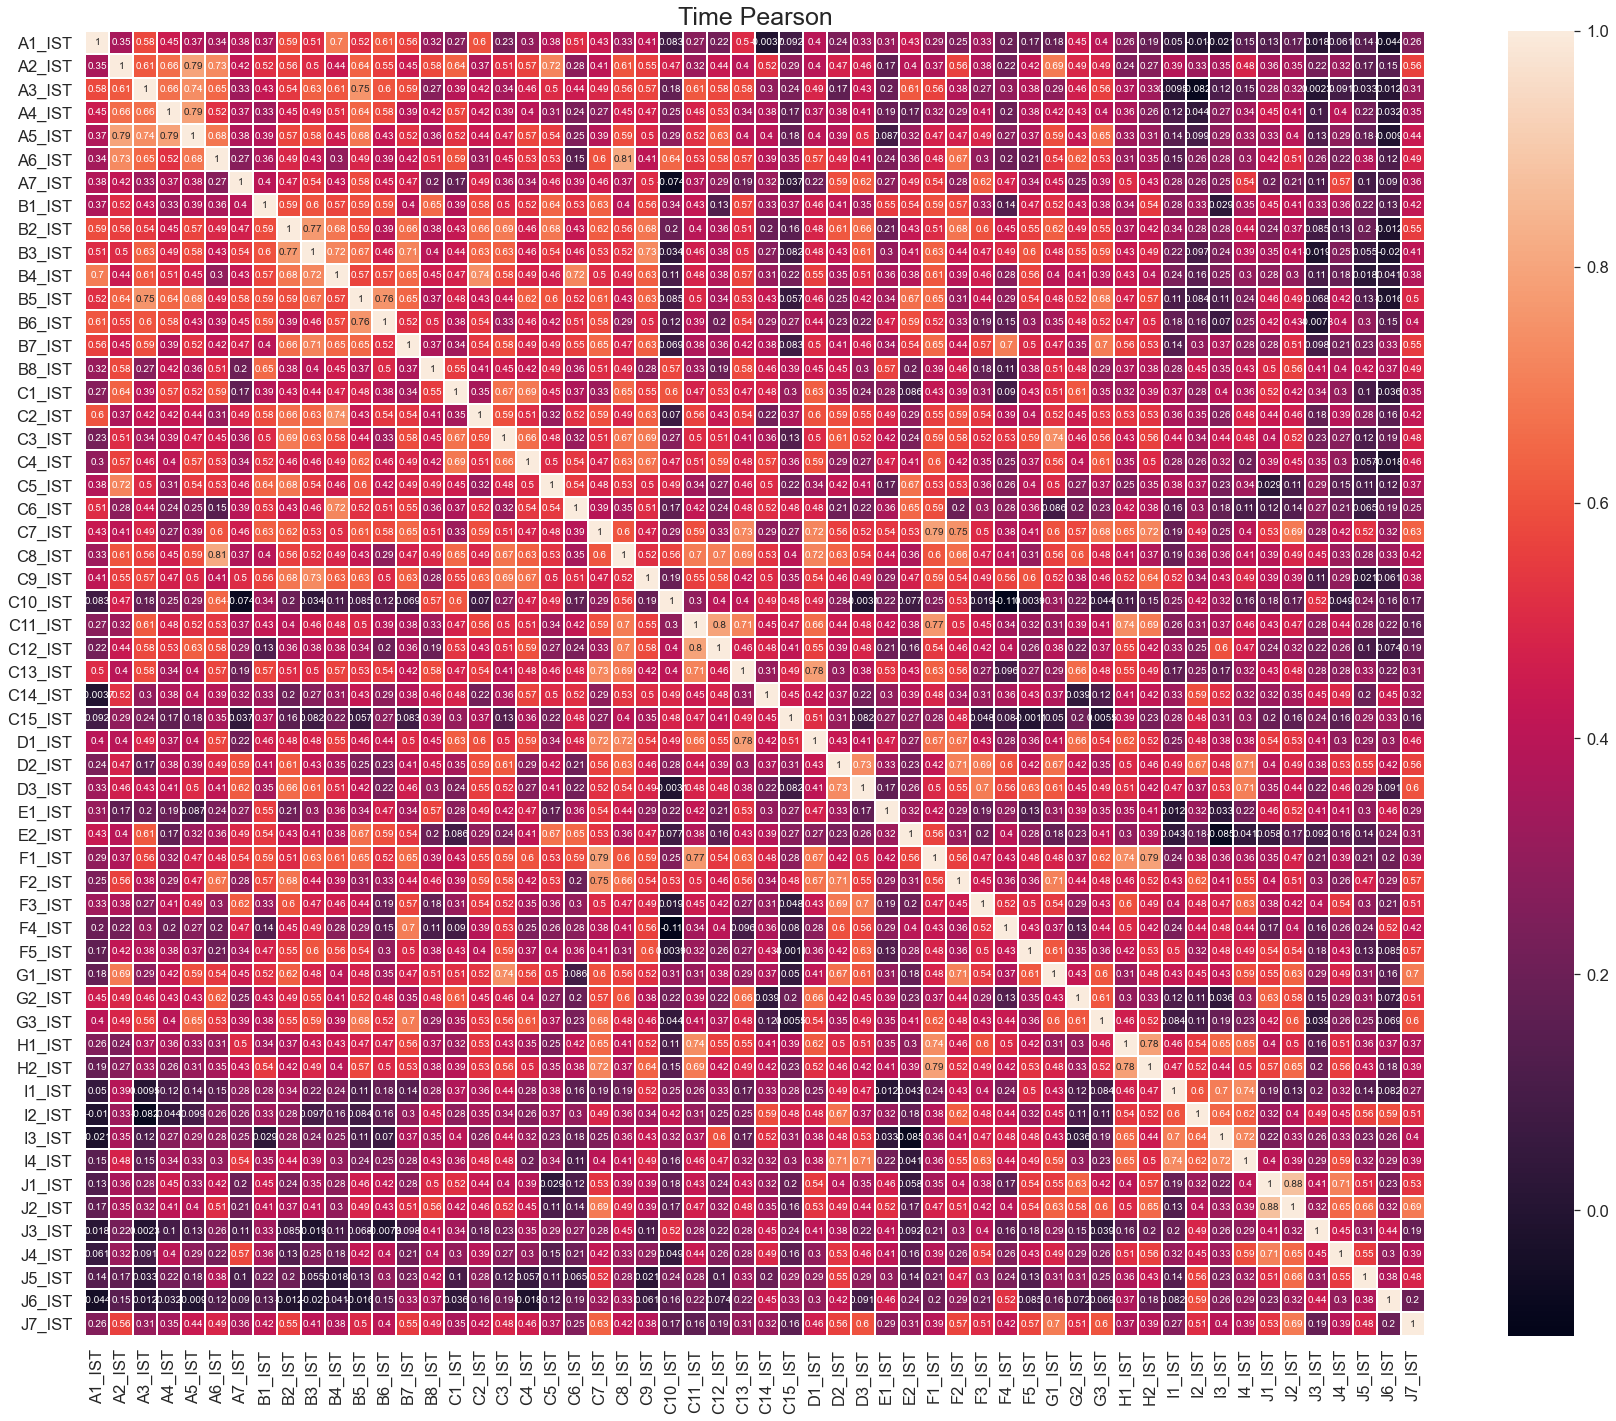

In [16]:
heatmap = plot_heatmap(t_corr, "Time Pearson")
save_heatmap(heatmap, "cris_time_pearson")

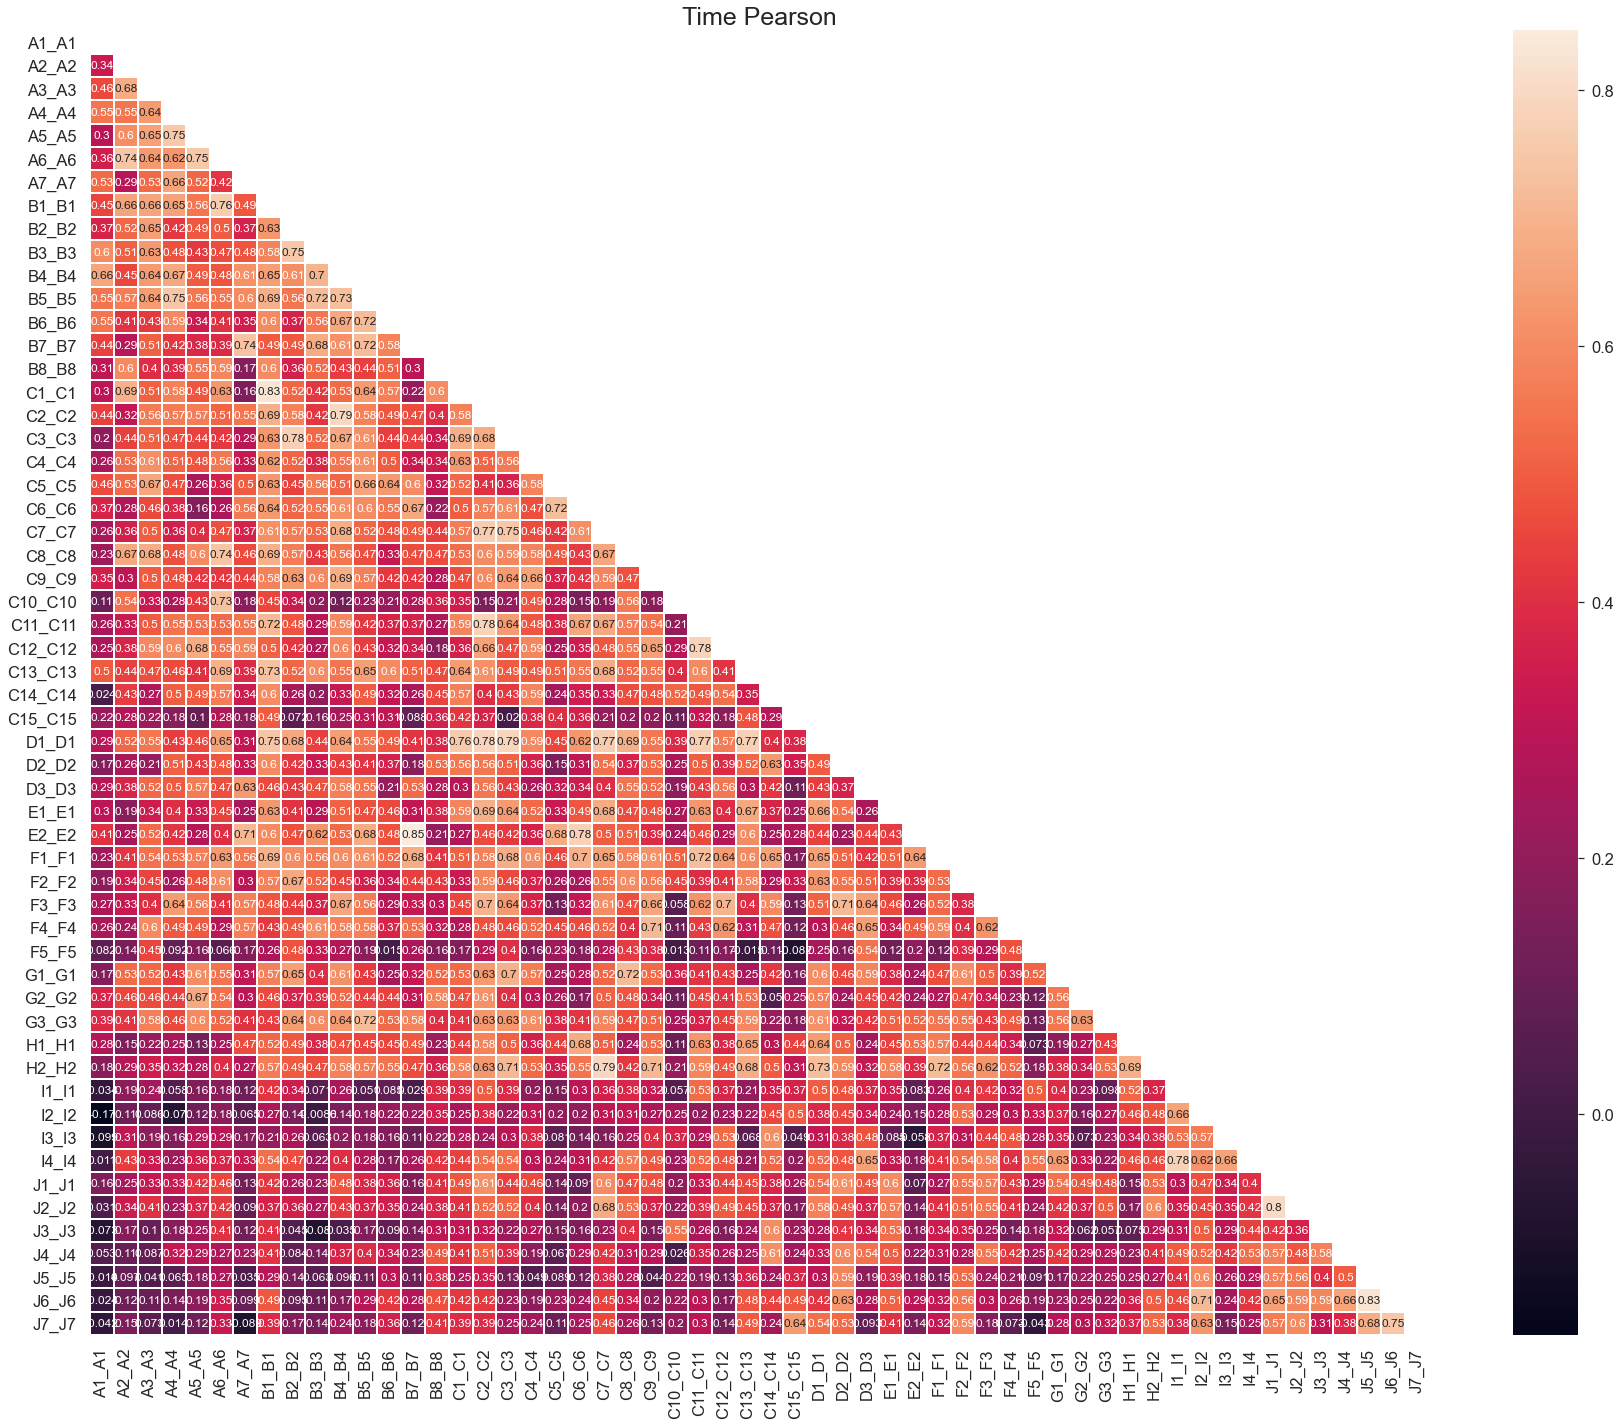

In [18]:
plot_half_heatmap(t_corr, "Time Pearson")
save_heatmap(heatmap, "cris_time_triu_pearson")

# Test

In [74]:
p_c_corr

A1_A1     A2_A2     A3_A3     A4_A4     A5_A5     A6_A6     A7_A7  \
A1_A1    1.000000  0.336441  0.459957  0.554261  0.295833  0.356890  0.531137   
A2_A2    0.336441  1.000000  0.680977  0.553917  0.604871  0.744913  0.294407   
A3_A3    0.459957  0.680977  1.000000  0.638331  0.653427  0.635192  0.525890   
A4_A4    0.554261  0.553917  0.638331  1.000000  0.752288  0.624618  0.661750   
A5_A5    0.295833  0.604871  0.653427  0.752288  1.000000  0.752805  0.519763   
A6_A6    0.356890  0.744913  0.635192  0.624618  0.752805  1.000000  0.415214   
A7_A7    0.531137  0.294407  0.525890  0.661750  0.519763  0.415214  1.000000   
B1_B1    0.448935  0.656195  0.661068  0.653389  0.555939  0.761639  0.485616   
B2_B2    0.370396  0.524282  0.646786  0.424367  0.492401  0.500316  0.367527   
B3_B3    0.604061  0.507746  0.633563  0.476892  0.427188  0.465486  0.480879   
B4_B4    0.664880  0.453714  0.638266  0.670873  0.493811  0.483848  0.613852   
B5_B5    0.551574  0.568273  0.641787  0.746068  0.559077  0.545067  0.599185   
B6_B6    0.550377  0.411064  0.428370  0.592869  0.337304  0.407778  0.349132   
B7_B7    0.444163  0.288034  0.508222  0.422372  0.380020  0.386285  0.736402   
B8_B8    0.307117  0.598320  0.396418  0.392598  0.553750  0.588115  0.172641   
C1_C1    0.301316  0.694531  0.507711  0.579923  0.486930  0.629561  0.155035   
C2_C2    0.444018  0.316638  0.564297  0.567255  0.568823  0.514019  0.553369   
C3_C3    0.195306  0.444556  0.505767  0.468370  0.444816  0.424405  0.291761   
C4_C4    0.261016  0.533577  0.611772  0.513308  0.484437  0.556493  0.325563   
C5_C5    0.461790  0.530468  0.666177  0.468816  0.255826  0.361156  0.496900   
C6_C6    0.371952  0.275897  0.460035  0.377741  0.162396  0.263981  0.562623   
C7_C7    0.261286  0.358986  0.500571  0.360440  0.399615  0.473139  0.365585   
C8_C8    0.230977  0.670224  0.682438  0.475589  0.600053  0.741022  0.462961   
C9_C9    0.354612  0.303393  0.495218  0.475332  0.417713  0.423793  0.442567   
C10_C10  0.107513  0.543805  0.331193  0.276614  0.428308  0.732855  0.184381   
C11_C11  0.261381  0.334406  0.495892  0.546653  0.534619  0.525364  0.553409   
C12_C12  0.254018  0.375216  0.592430  0.603582  0.676734  0.550400  0.591194   
C13_C13  0.495823  0.444287  0.469570  0.463485  0.407329  0.694347  0.392631   
C14_C14  0.023897  0.429604  0.274124  0.501231  0.492669  0.571879  0.341061   
C15_C15  0.216632  0.281193  0.222098  0.180590  0.104192  0.277426  0.181866   
D1_D1    0.290239  0.520251  0.554164  0.434583  0.461213  0.651334  0.310603   
D2_D2    0.170374  0.260207  0.211935  0.507395  0.425211  0.484516  0.326849   
D3_D3    0.292756  0.376453  0.522579  0.495032  0.566980  0.470406  0.633913   
E1_E1    0.299697  0.188748  0.341322  0.403356  0.334889  0.446595  0.252196   
E2_E2    0.406048  0.254573  0.524903  0.415686  0.278323  0.399705  0.709309   
F1_F1    0.230965  0.413455  0.543128  0.526969  0.570997  0.633164  0.556540   
F2_F2    0.194676  0.343379  0.448795  0.259498  0.479704  0.607411  0.297172   
F3_F3    0.268091  0.327886  0.397242  0.642919  0.561363  0.412207  0.574902   
F4_F4    0.256879  0.239402  0.598295  0.489140  0.489352  0.286623  0.573628   
F5_F5    0.082177  0.143351  0.450654  0.092352  0.163223  0.065527  0.169011   
G1_G1    0.167898  0.529956  0.522935  0.426928  0.607617  0.545276  0.310644   
G2_G2    0.371935  0.455517  0.464865  0.443551  0.669830  0.539409  0.297950   
G3_G3    0.385359  0.413953  0.575206  0.458654  0.596940  0.521692  0.405893   
H1_H1    0.283726  0.154179  0.220718  0.250247  0.129043  0.247385  0.465943   
H2_H2    0.176629  0.285881  0.352472  0.322756  0.283136  0.396744  0.274096   
I1_I1   -0.034253  0.187647  0.244982  0.057761  0.159646  0.184617  0.117176   
I2_I2   -0.172385  0.111556  0.085835 -0.070046  0.116244  0.184456  0.065319   
I3_I3   -0.098826  0.310052  0.191510  0.162433  0.287005  0.294847  0.171432   
I4_I4    0.010662  0.434333  0.334188  0.22

In [57]:
df_test = p_c_corr.iloc[:2, :2]
df_test

A1_A1     A2_A2
A1_A1  1.000000  0.336441
A2_A2  0.336441  1.000000

In [67]:
df = sns.load_dataset('iris')


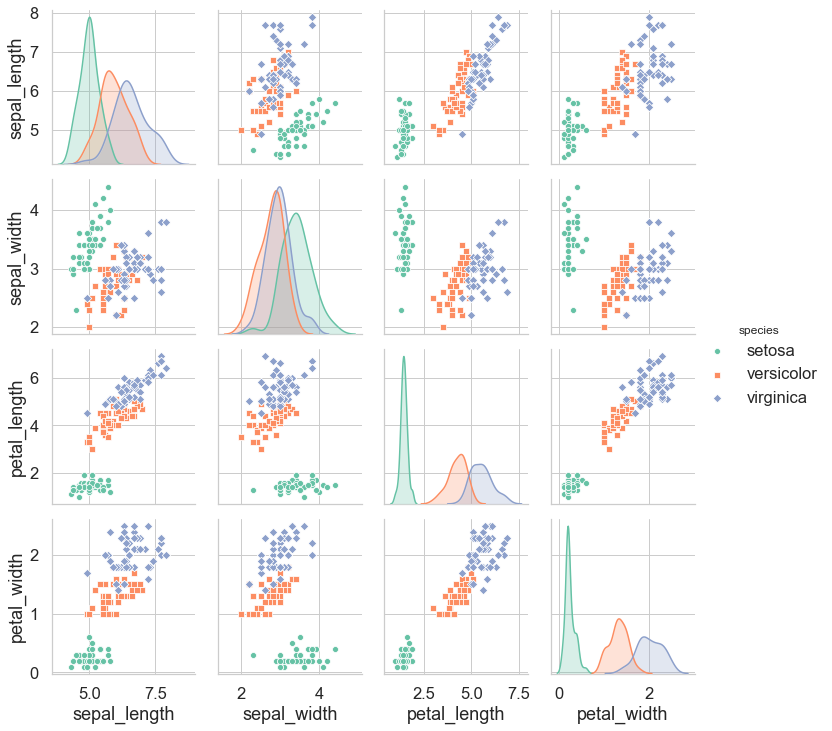

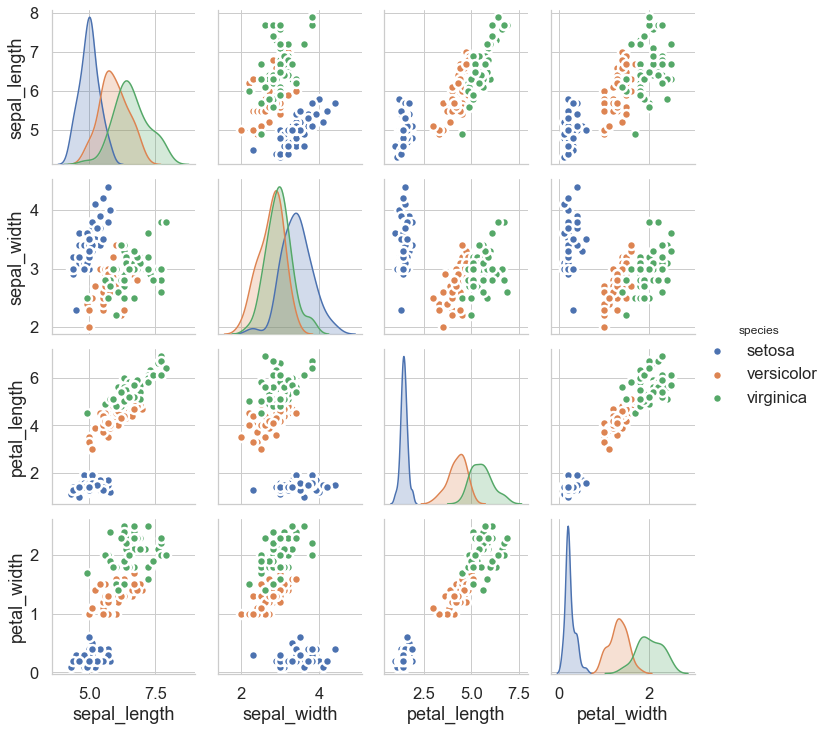

In [69]:
# left
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()
 
# right: you can give other arguments with plot_kws.
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()



<Figure size 1080x432 with 0 Axes>

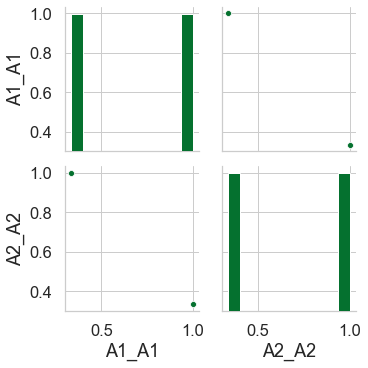

In [56]:
#df_c = df[columns_c]
#df_test = df_c.iloc[:, :2]
# with regression
plt.figure(figsize = (15, 6))
sns.pairplot(df_test, kind="scatter")
plt.show()

Text(0.5, 1.0, 'A1_A1 vs A2_A2')

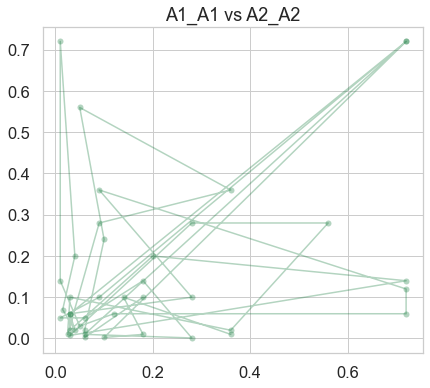

In [46]:
# Cut your window in 1 row and 2 columns, and start a plot in the first part
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.plot( 'A1_A1', 'A2_A2', data=df_test, marker='o', alpha=0.3)
plt.title("A1_A1 vs A2_A2")


In [47]:
p_c_corr

A1_A1     A2_A2     A3_A3     A4_A4     A5_A5     A6_A6     A7_A7  \
A1_A1    1.000000  0.336441  0.459957  0.554261  0.295833  0.356890  0.531137   
A2_A2    0.336441  1.000000  0.680977  0.553917  0.604871  0.744913  0.294407   
A3_A3    0.459957  0.680977  1.000000  0.638331  0.653427  0.635192  0.525890   
A4_A4    0.554261  0.553917  0.638331  1.000000  0.752288  0.624618  0.661750   
A5_A5    0.295833  0.604871  0.653427  0.752288  1.000000  0.752805  0.519763   
A6_A6    0.356890  0.744913  0.635192  0.624618  0.752805  1.000000  0.415214   
A7_A7    0.531137  0.294407  0.525890  0.661750  0.519763  0.415214  1.000000   
B1_B1    0.448935  0.656195  0.661068  0.653389  0.555939  0.761639  0.485616   
B2_B2    0.370396  0.524282  0.646786  0.424367  0.492401  0.500316  0.367527   
B3_B3    0.604061  0.507746  0.633563  0.476892  0.427188  0.465486  0.480879   
B4_B4    0.664880  0.453714  0.638266  0.670873  0.493811  0.483848  0.613852   
B5_B5    0.551574  0.568273  0.641787  0.746068  0.559077  0.545067  0.599185   
B6_B6    0.550377  0.411064  0.428370  0.592869  0.337304  0.407778  0.349132   
B7_B7    0.444163  0.288034  0.508222  0.422372  0.380020  0.386285  0.736402   
B8_B8    0.307117  0.598320  0.396418  0.392598  0.553750  0.588115  0.172641   
C1_C1    0.301316  0.694531  0.507711  0.579923  0.486930  0.629561  0.155035   
C2_C2    0.444018  0.316638  0.564297  0.567255  0.568823  0.514019  0.553369   
C3_C3    0.195306  0.444556  0.505767  0.468370  0.444816  0.424405  0.291761   
C4_C4    0.261016  0.533577  0.611772  0.513308  0.484437  0.556493  0.325563   
C5_C5    0.461790  0.530468  0.666177  0.468816  0.255826  0.361156  0.496900   
C6_C6    0.371952  0.275897  0.460035  0.377741  0.162396  0.263981  0.562623   
C7_C7    0.261286  0.358986  0.500571  0.360440  0.399615  0.473139  0.365585   
C8_C8    0.230977  0.670224  0.682438  0.475589  0.600053  0.741022  0.462961   
C9_C9    0.354612  0.303393  0.495218  0.475332  0.417713  0.423793  0.442567   
C10_C10  0.107513  0.543805  0.331193  0.276614  0.428308  0.732855  0.184381   
C11_C11  0.261381  0.334406  0.495892  0.546653  0.534619  0.525364  0.553409   
C12_C12  0.254018  0.375216  0.592430  0.603582  0.676734  0.550400  0.591194   
C13_C13  0.495823  0.444287  0.469570  0.463485  0.407329  0.694347  0.392631   
C14_C14  0.023897  0.429604  0.274124  0.501231  0.492669  0.571879  0.341061   
C15_C15  0.216632  0.281193  0.222098  0.180590  0.104192  0.277426  0.181866   
D1_D1    0.290239  0.520251  0.554164  0.434583  0.461213  0.651334  0.310603   
D2_D2    0.170374  0.260207  0.211935  0.507395  0.425211  0.484516  0.326849   
D3_D3    0.292756  0.376453  0.522579  0.495032  0.566980  0.470406  0.633913   
E1_E1    0.299697  0.188748  0.341322  0.403356  0.334889  0.446595  0.252196   
E2_E2    0.406048  0.254573  0.524903  0.415686  0.278323  0.399705  0.709309   
F1_F1    0.230965  0.413455  0.543128  0.526969  0.570997  0.633164  0.556540   
F2_F2    0.194676  0.343379  0.448795  0.259498  0.479704  0.607411  0.297172   
F3_F3    0.268091  0.327886  0.397242  0.642919  0.561363  0.412207  0.574902   
F4_F4    0.256879  0.239402  0.598295  0.489140  0.489352  0.286623  0.573628   
F5_F5    0.082177  0.143351  0.450654  0.092352  0.163223  0.065527  0.169011   
G1_G1    0.167898  0.529956  0.522935  0.426928  0.607617  0.545276  0.310644   
G2_G2    0.371935  0.455517  0.464865  0.443551  0.669830  0.539409  0.297950   
G3_G3    0.385359  0.413953  0.575206  0.458654  0.596940  0.521692  0.405893   
H1_H1    0.283726  0.154179  0.220718  0.250247  0.129043  0.247385  0.465943   
H2_H2    0.176629  0.285881  0.352472  0.322756  0.283136  0.396744  0.274096   
I1_I1   -0.034253  0.187647  0.244982  0.057761  0.159646  0.184617  0.117176   
I2_I2   -0.172385  0.111556  0.085835 -0.070046  0.116244  0.184456  0.065319   
I3_I3   -0.098826  0.310052  0.191510  0.162433  0.287005  0.294847  0.171432   
I4_I4    0.010662  0.434333  0.334188  0.22